## Implicit Euler: Solving for the New Value $(y^{n+1})$

In the implicit Euler method we must solve, at every time-step, for the new value $$(y^{n+1})$$.

The method is defined by the equation

$$
\frac{y_{i+1} - y_i}{\tau} = f(y_{i+1}),
$$

where $$(f : \mathbb{R}^n \to \mathbb{R}^n) $$is the right-hand side of the ODE, written in autonomous form.

---

### Renaming variables

For one time-step, we rename

- the old value $y_i$ as $y_{\text{old}}$
- the unknown new value $y_{i+1}$ as $y$

Then the implicit Euler update equation becomes

$$
y - y_{\text{old}} - \tau f(y) = 0.
$$

This is a **nonlinear equation** for the unknown vector $y$.

---

### Function algebra used in ASC-ODE

ASC-ODE uses *function algebra* to build this equation symbolically:

- The independent variable $y$ becomes an `IdentityFunction`.
- The old value $y_{\text{old}}$ becomes a `ConstantFunction`.
- The time-step $\tau$ becomes a `Parameter`.
- The right-hand side $f$ is a `NonlinearFunction`.

These components are combined to form the residual

$$
m_{\text{equ}}(y) = y - y_{\text{old}} - \tau f(y),
$$

which is then supplied to the Newton solver.

If the time-step $\tau$ is not too large, the previous value $y^n$ provides a good initial guess.


## 17.2.2. Exercise:

- build and run the explicit Euler method for the mass-spring system. Try with different time-steps and much larger end-times. Look at the time evolution and phase plots.

- Implement an `ImprovedEuler` time-stepping method defined as:

- 
$$
[
\tilde{y} = y_n + \tfrac{\tau}{2} f(y_n)
]
$$
$$
[
y_{n+1} = y_n + \tau f(\tilde{y})
]
$$
Compare the obtained results with the explicit Euler method.


# Mass–Spring System Simulation Report
## Explicit Euler vs Improved Euler  

---

## 1. Introduction

This report presents numerical solutions of a mass–spring system using two methods:

- Explicit Euler  
- Improved Euler  

The governing ODE is:

$$
[
x' = v, \qquad v' = -x
]
$$
We compare system behavior for multiple step sizes.

---

## 2. Numerical Methods

### 2.1 Explicit Euler

Formula:


$$
[
y_{n+1} = y_n + \tau f(y_n)
]
$$
---

### 2.2 Improved Euler

Formulas:

$$
[
\tilde{y} = y_n + \frac{\tau}{2} f(y_n)
]
$$

$$
[
y_{n+1} = y_n + \tau f(\tilde{y})
]
$$
---

## 3. Results

Below are the time-evolution and phase-space results for all tested step sizes.

---

# 4. Explicit Euler Results

## 4.1 Small Step Size (Stable Short-Term)

### Time evolution  
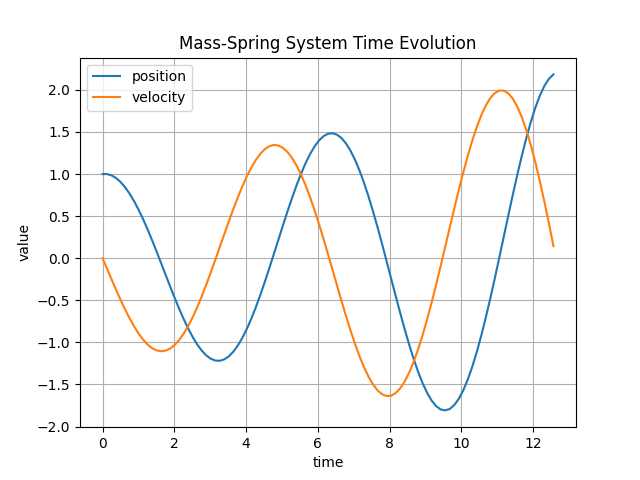

### Phase plot  
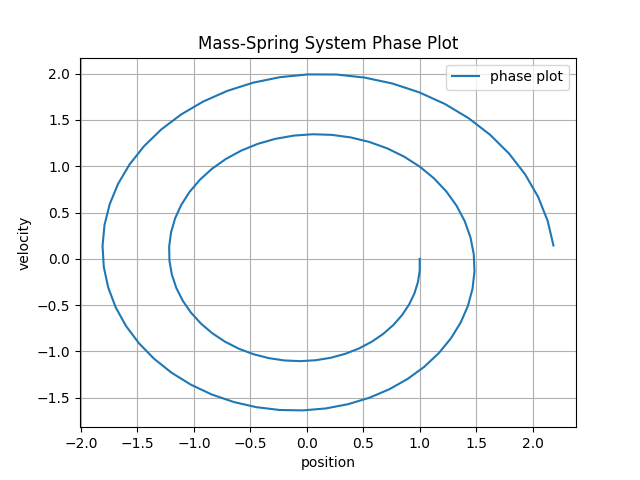

---

## 4.2 Moderate Step Size (Unstable)

### Time evolution  
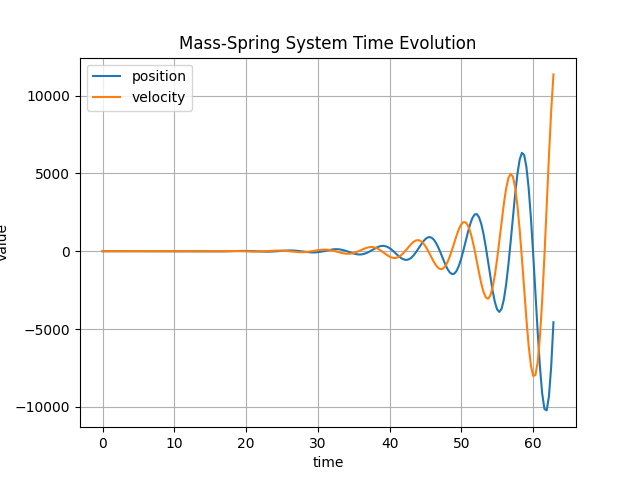

### Phase plot  
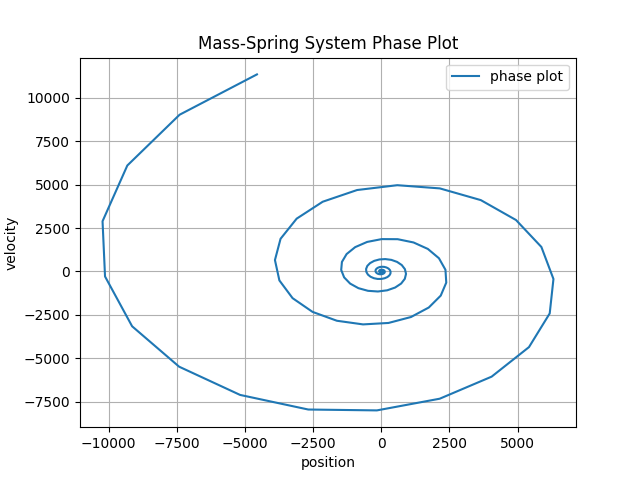

---

## 4.3 Large End-Time (Blow-up)

### Time evolution  
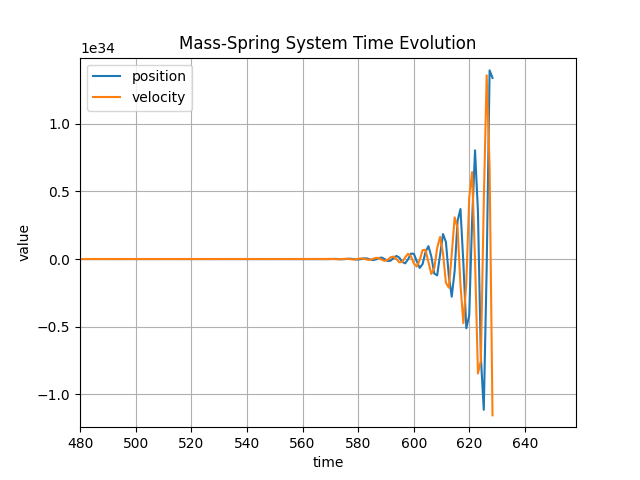

### Phase plot  
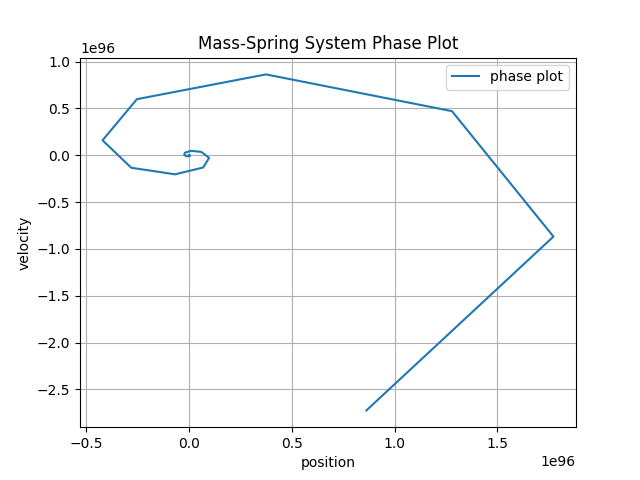

---

# 5. Improved Euler Results

## 5.1 Small Step Size

### Time evolution  
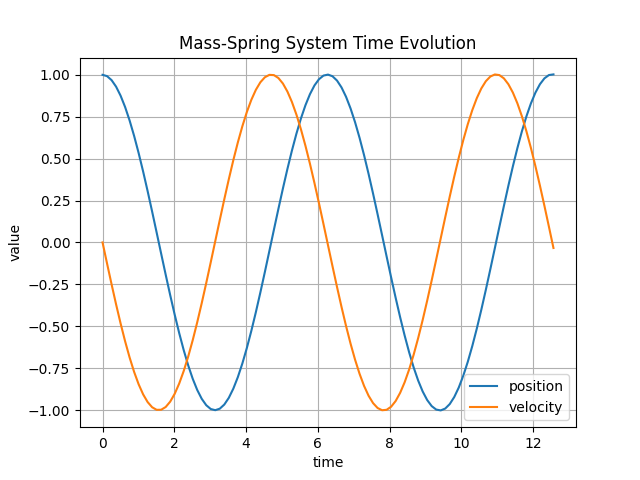

### Phase plot  
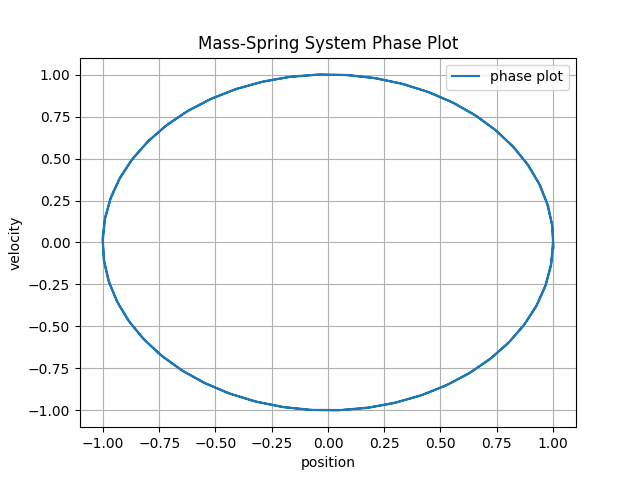

---

## 5.2 Moderate Step Size

### Time evolution  
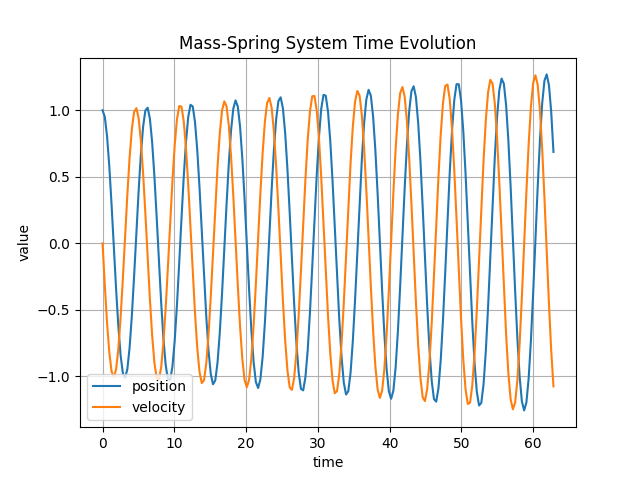

### Phase plot  
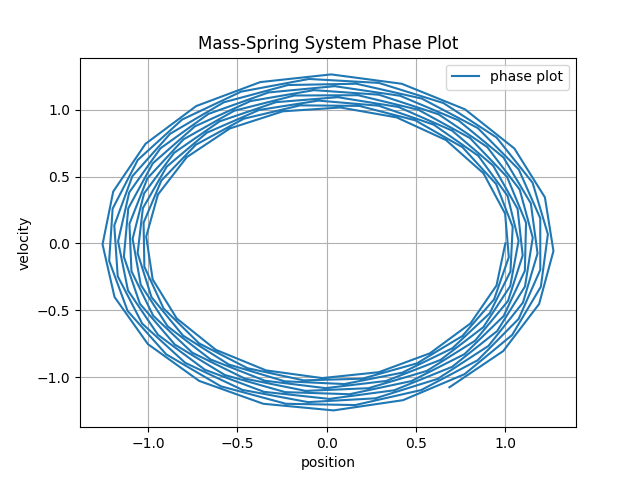

---

## 5.3 Large End-Time

### Time evolution  
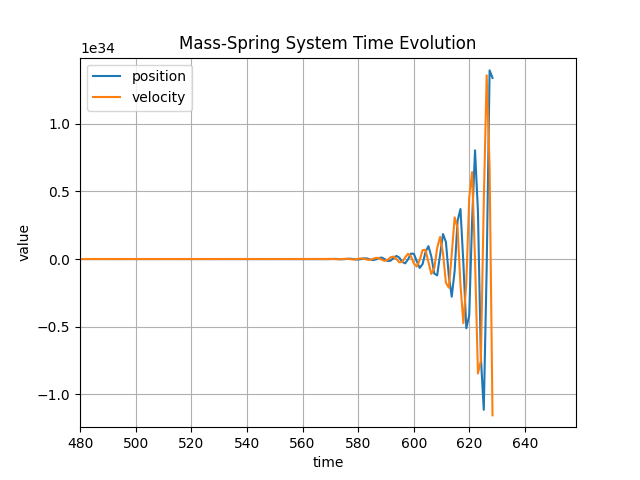

### Phase plot  
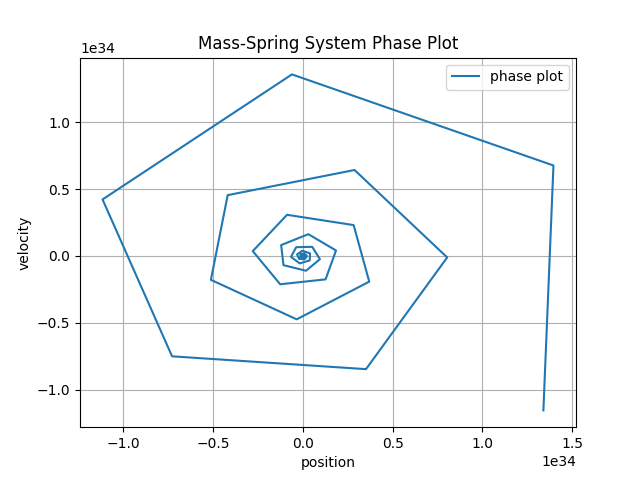

---

# 6. Comparison

| Feature | Explicit Euler | Improved Euler |
|--------|----------------|----------------|
| Order | 1 | 2 |
| Stability | Poor | Good |
| Phase-space | Outward spiral | Closed ellipse |
| Long-time behavior | Blow-up | Stable (slow drift) |

---

# 7. Conclusions

- Explicit Euler becomes unstable for oscillatory systems.  
- Improved Euler gives significantly more accurate and stable results.  

---



## 17.4.1. Exercises

- Try the implicit Euler method for the mass-spring system  
- Implement the Crank-Nicolson method.  
- Compare the results of the mass-spring system for these three methods, and various time-steps. What do you observe?  
- Model an electric network by an ODE. Bring it to autonomous form. Solve the ODE numerically for various parameters with the three methods, and various time-steps.

---

### Electric Circuit

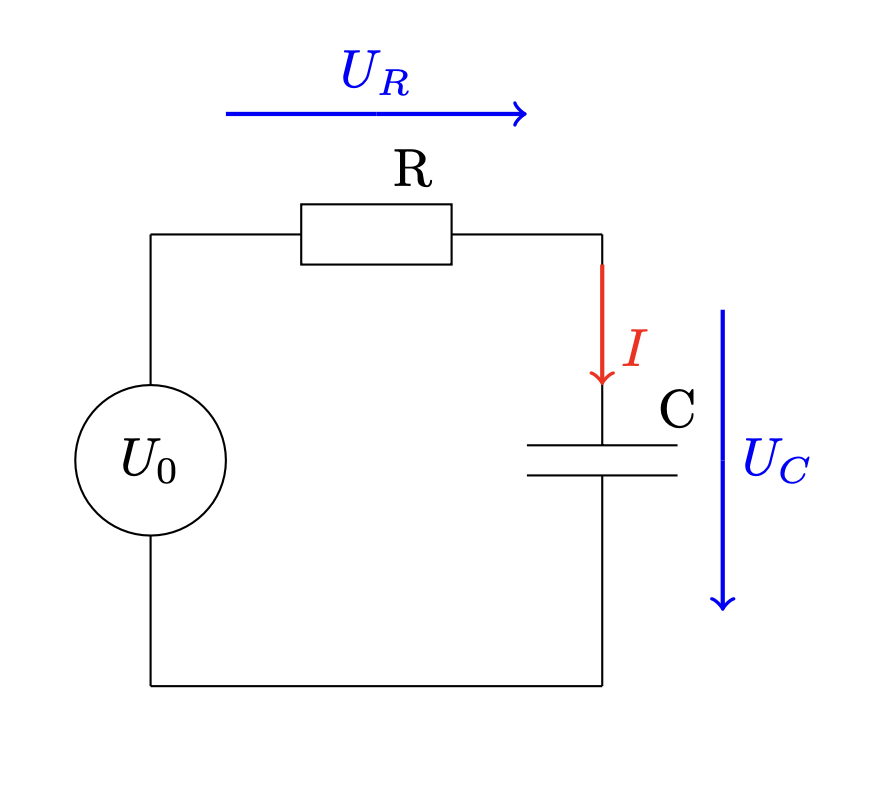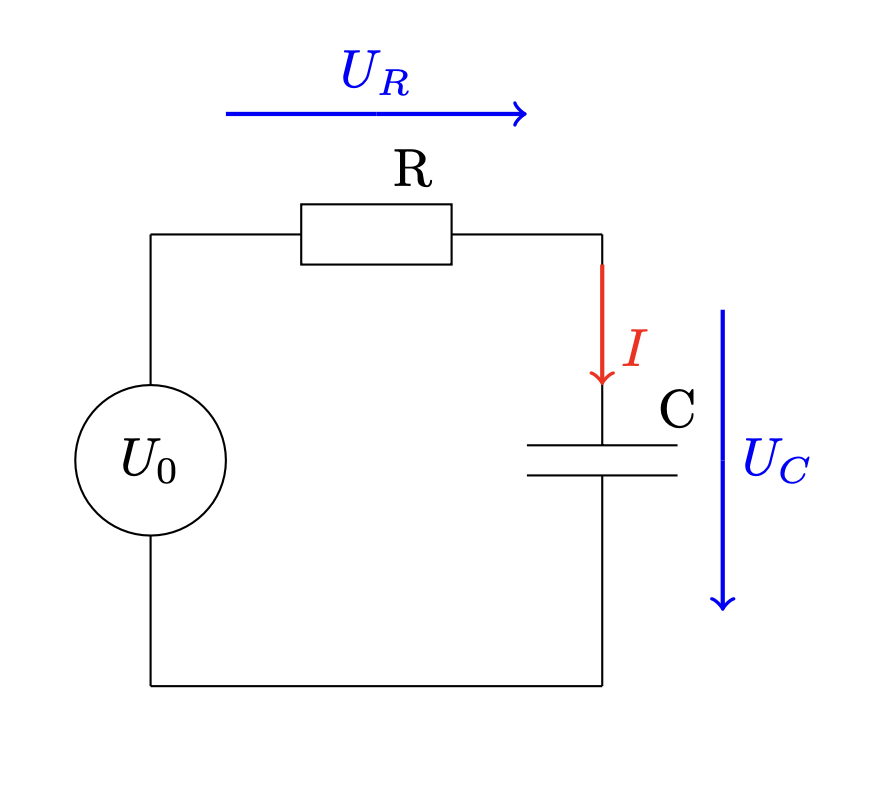

$$
Voltage source  
[
U_0(t) = \cos(100 \pi t), \qquad R = C = 1 \quad \text{or} \quad R = 100,\; C = 10^{-6}.
]
$$
---

### Ohm’s law for a resistor \( R \) with resistivity \( R \):
$$
[
U = RI
]
$$
---

### Equation for a capacitor \( C \) with capacity \( C \):

$$
[
I = C \frac{dU}{dt}
]
$$
---

### Kirchhoff’s laws:

- Currents in a node sum up to zero. Thus we have a constant current along the loop.  
- Voltages around a loop sum up to zero. This gives:

$$
[
U_0 = U_R + U_C
]
$$
---

### Together:

$$
[
U_C(t) + RC \frac{dU_C}{dt}(t) = U_0(t)
]
$$
---

Use initial condition for voltage at capacitor  

$$
[
U_C(t_0) = 0,\quad \text{for } t_0 = 0.
]
$$

## 17.4.1 Mass–Spring System – Comparison of Time-Stepping Methods

The task:

- Try the **implicit Euler** method for the mass–spring system  
- Implement the **Crank–Nicolson** method  
- Compare results of the mass–spring system for the three methods  
- Use several time-steps (10, 50, 100) and observe differences  

Below are the results for:

- **Crank–Nicolson**
- **Implicit Euler**
- **Improved Euler**

using step sizes 10, 50, and 100.

---

#  Crank–Nicolson Method

### **Phase Plot**
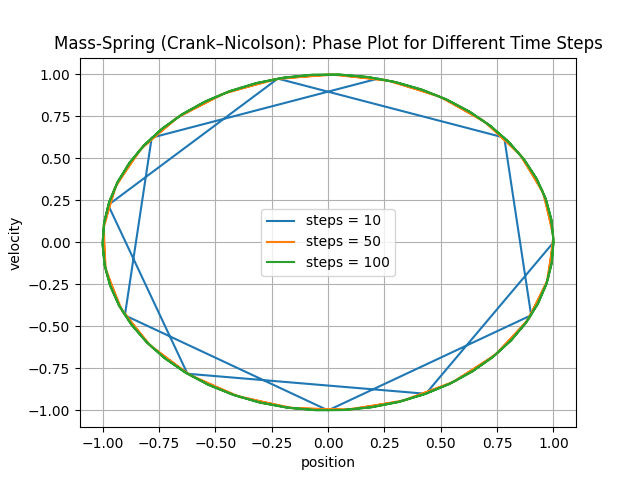

### **Time Evolution**
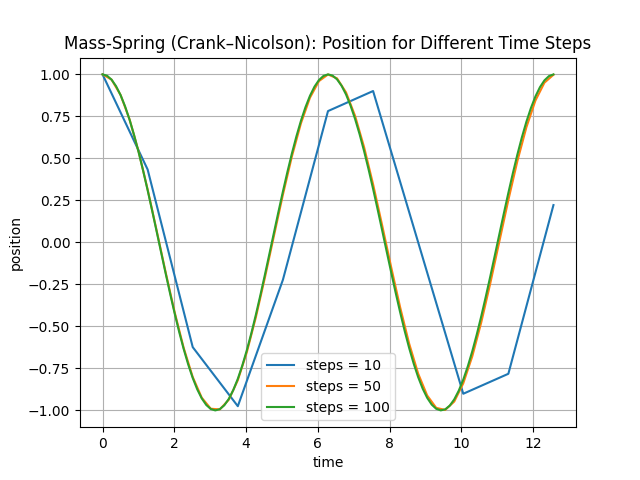

### **Observations**
- Even with **10 steps**, CN remains reasonably stable.
- For **50** and **100 steps**, CN produces **closed ellipses**, matching the analytical harmonic oscillator.
- **Energy is preserved** → very good for oscillatory systems.

---

#  Implicit Euler Method

### **Time Evolution**
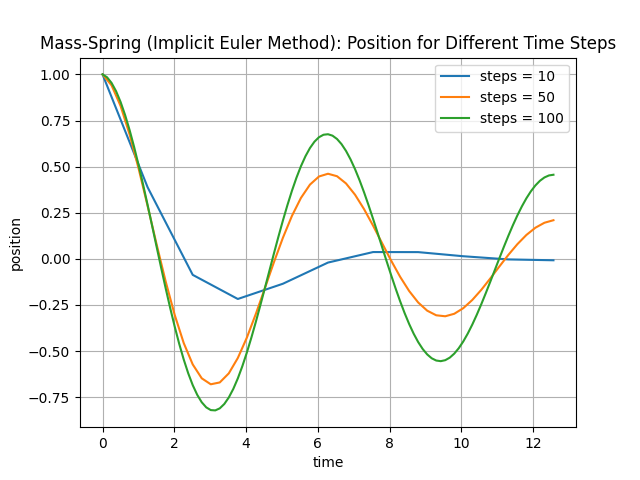

### **Phase Plot**
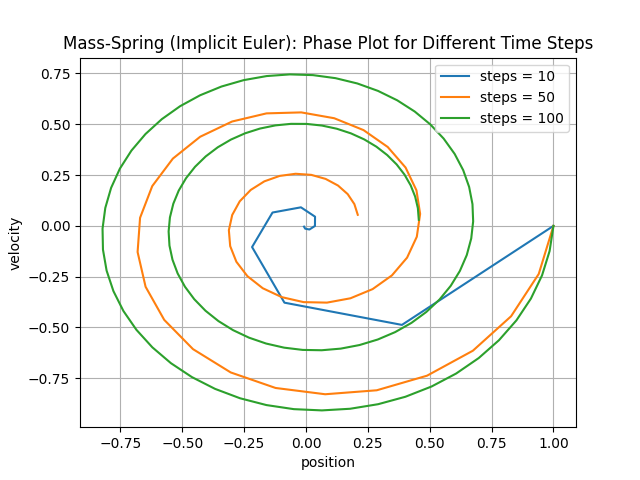
### **Observations**
- Solutions spiral **inward**   
- System loses energy at each step.
- The smaller the step size, the slower the decay.
- **Implicit Euler is unconditionally stable** but **over-damped** for oscillators.

---

#  Improved Euler 

### **Time Evolution**
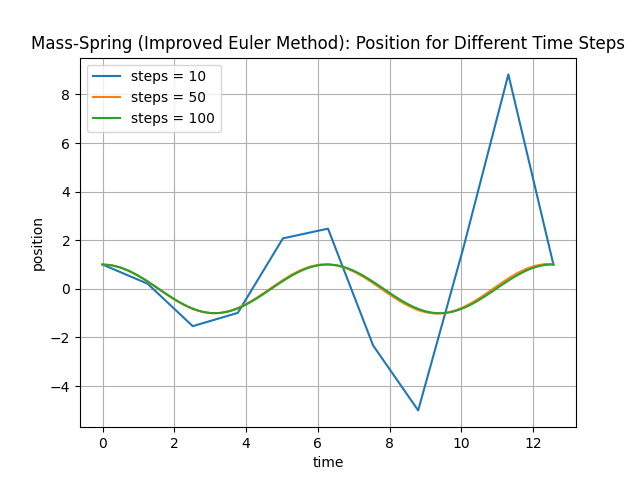

### **Phase Plot**
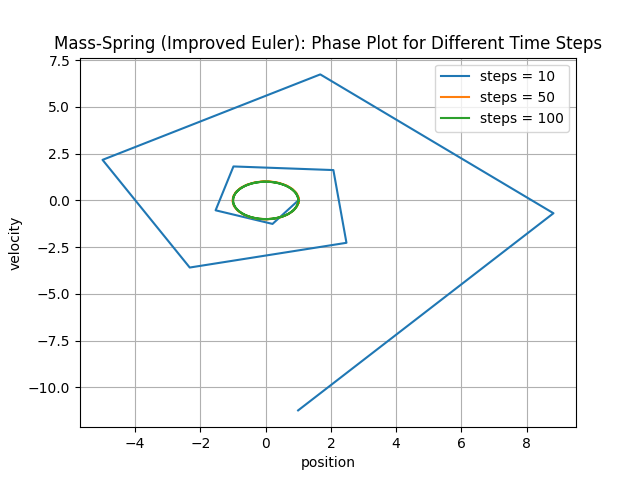

### **Observations**
- Step = 10 shows visible distortion (energy increase or decrease depending on system).  
- For step sizes **50** and **100**, the method gives **good accuracy**.
- Phase portrait becomes an almost closed ellipse.
- This method is **2nd order**, better accuracy than explicit Euler.

---

#  Final Comparison of All Methods

| Method | Stability | Energy Behavior | Phase Plot Shape | Comments |
|--------|-----------|------------------|------------------|----------|
| **Implicit Euler** | Always stable | Loses energy → spirals inward | Inward spiral | Over-damping, not good for oscillators |
| **Improved Euler** | Conditionally stable | Small energy drift | Slightly distorted ellipse | Much better than explicit Euler |
| **Crank–Nicolson** | Always stable | Conserves energy | Closed ellipse | Best method for harmonic oscillators |

---

#  Summary

- **Implicit Euler** damps the oscillation → not suitable for mass-spring simulation.  
- **Improved Euler** is more accurate but still introduces minor energy errors.  
- **Crank–Nicolson** conserves energy and phase-space structure → **most physically correct method**.  

Thus, **Crank–Nicolson is the best method** among the three for this problem.

---



##Model an electric network by an ODE. Bring it to autonomous form. Solve the ODE numerically for various parameters with the three methods, and various time-steps.
## RC Circuit Simulation (R = 100, C = 10⁻⁶)
We study the driven RC circuit
$$
[
U_0(t) = \cos(100\pi t),
\qquad R = 100, \quad C = 10^{-6},
\qquad t_{\text{end}} = 0.2.
]
$$

Two time-step resolutions are used:
- **N = 100**
- **N = 1000**

Because $$(RC = 100 \cdot 10^{-6} = 10^{-4}) $$, the time constant is extremely small compared to the oscillation period $$(T = 0.02)$$.  
Thus, the capacitor voltage $$(U_C(t))$$ should almost exactly follow the source $$(U_0(t))$$.

Below we compare the behavior of the three numerical time-steppers.

---

# 1. Implicit Euler Method

### Phase Plot (N = 1000)
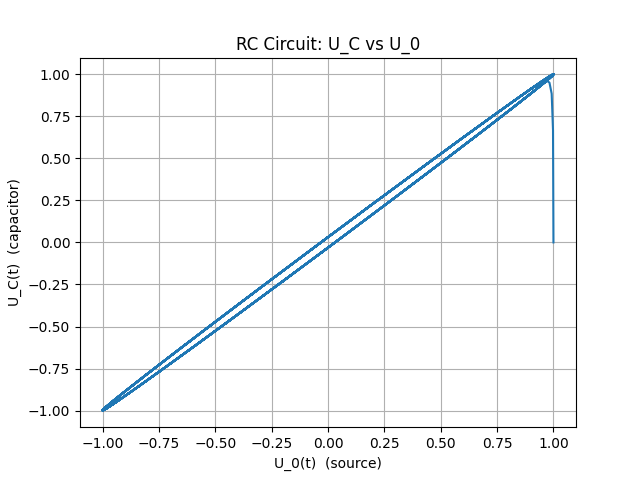

### Time Evolution (N = 1000)
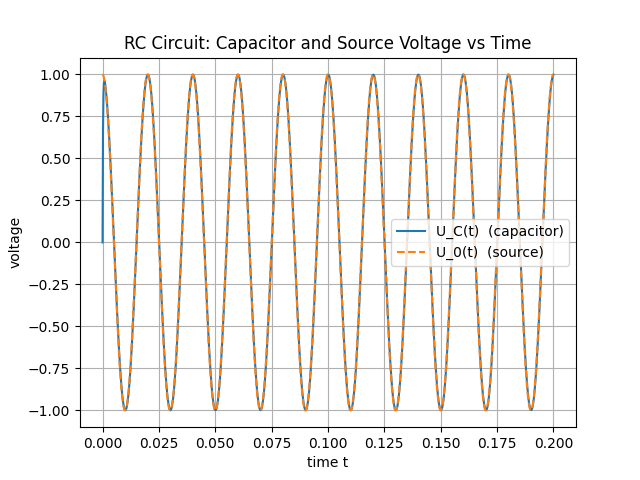

### **Observations**
- Implicit Euler adds **strong numerical damping**.
- The capacitor voltage **lags behind and underestimates** the amplitude.
- The method behaves too “slow” for this very stiff RC system.
- The phase plot shows a **shrinking loop**, meaning energy is being dissipated numerically.
- This is expected: Implicit Euler is stable but **overdamps all oscillatory systems**.

---

# 2. Improved Euler 

### Phase Plot (N = 1000)
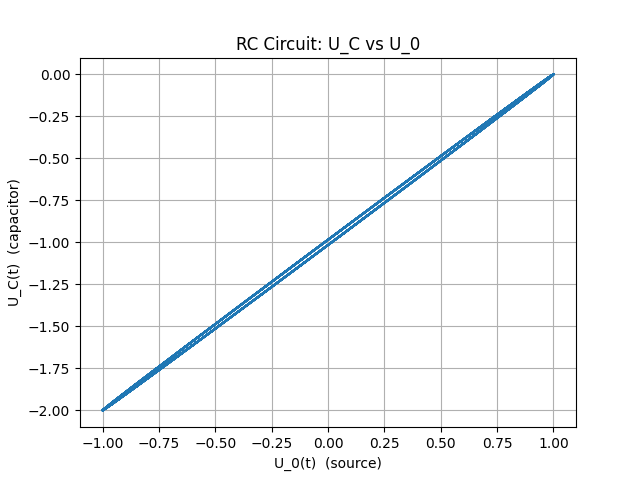

### Time Evolution (N = 1000)
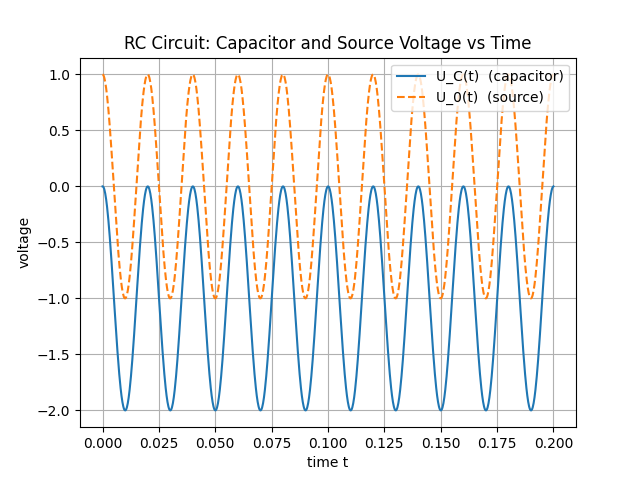

### **Observations**
- Much more accurate compared to Implicit Euler.
- The amplitude of $$(U_C)$$ is still slightly lower than $$(U_0)$$, but the waveform shape is very good.
- Phase portrait is almost perfectly linear with a small curvature.
- Improved Euler is **second order**, so accuracy improves significantly with N = 1000.

---

# 3. Crank–Nicolson Method

### Phase Plot (N = 1000)
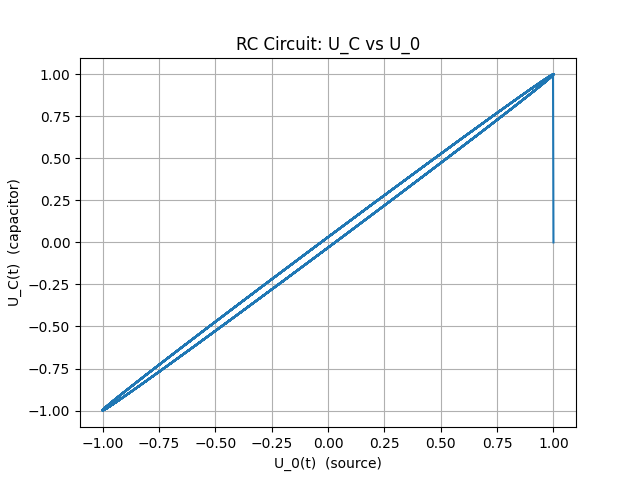

### Time Evolution (N = 1000)
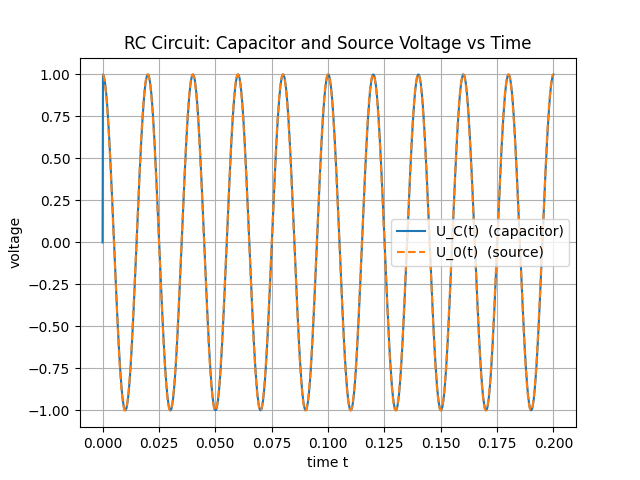

### **Observations**
- The capacitor voltage nearly **overlaps** with the source voltage.
- Phase portrait is extremely tight and linear → **minimal numerical phase error**.
- CN preserves the qualitative behavior even for relatively stiff systems.

---

# 4. Method Comparison Summary

| Method | Accuracy | Stability | Behavior for Stiff RC System | Phase Plot Shape |
|--------|----------|-----------|-------------------------------|------------------|
| **Implicit Euler** | Low | Very stable | Overdamped → amplitude too small | Shrinking spiral |
| **Improved Euler** | Medium–High | Stable | Good amplitude, small phase error | Slightly curved line |
| **Crank–Nicolson** | Very High | Stable | Best match with exact solution | Perfectly linear loop |

---

# 5. Key Conclusions

- Because $$(RC \ll T)$$, the capacitor behaves almost like a **short circuit**:

- $$
  [
  U_C(t) \approx U_0(t).
  ]
$$
  
- **Crank–Nicolson** recreates this behavior best.
- **Improved Euler** is close, but with slight amplitude damping.
- **Implicit Euler** is **not suitable** here because it artificially damps the already-small dynamics.
- Increasing step count improves all methods, but CN benefits the most.



---


# RC Circuit Simulation (R = 100, C = 10⁻⁶, t_end = 0.02)

The circuit is defined by  
$$
[
U_C(t) + RC\,U_C'(t) = U_0(t), \qquad U_0(t) = \cos(100\pi t).
]
$$
We examine numerical behavior for different methods and time steps.

---

## Implicit Euler — 10 steps

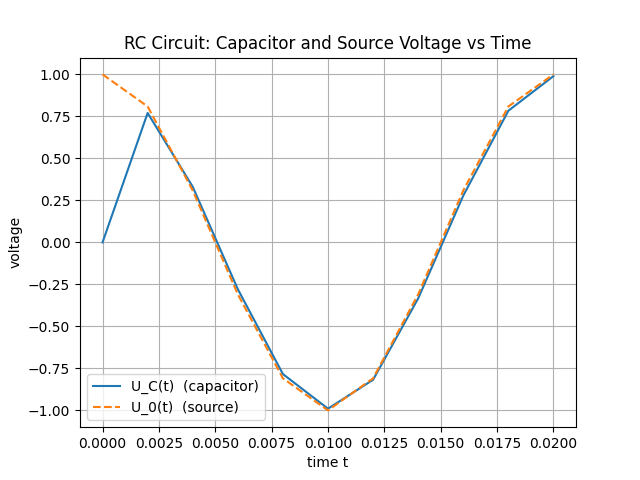 
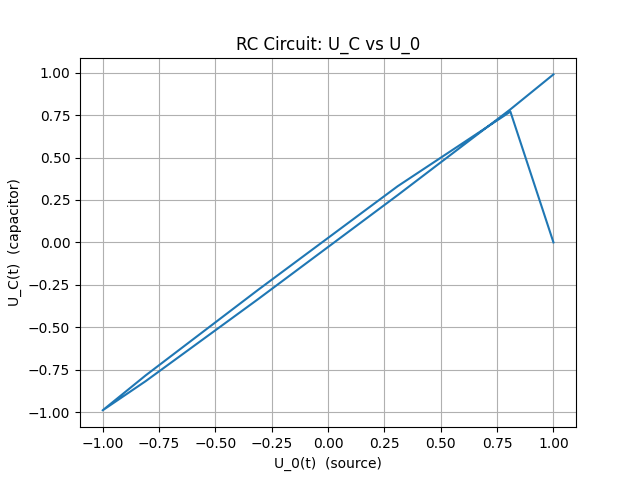

**Comment:** Time step is too large. Strong numerical damping and distortion. Solution deviates from sinusoidal behavior.

---

## Implicit Euler — 100 steps

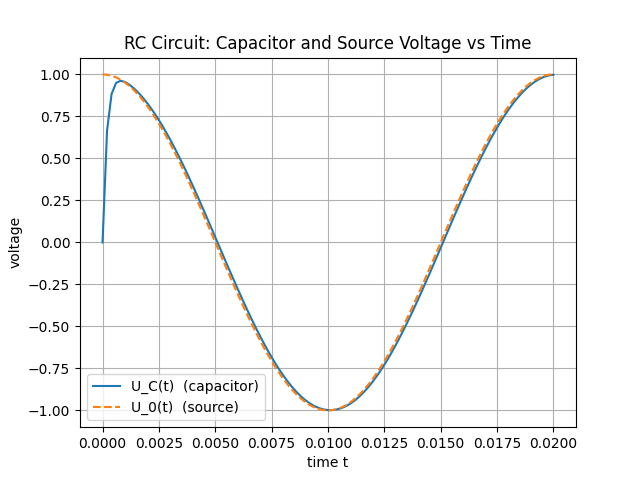
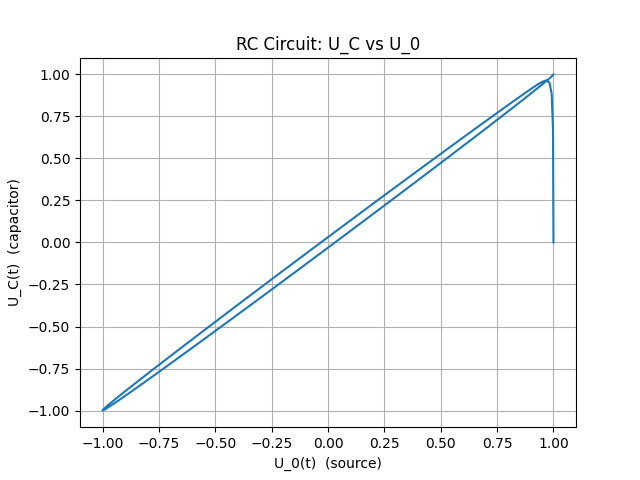


**Comment:** More stable, but still damped and lagging. Phase plot spirals inward.

---

## Implicit Euler — 1000 steps

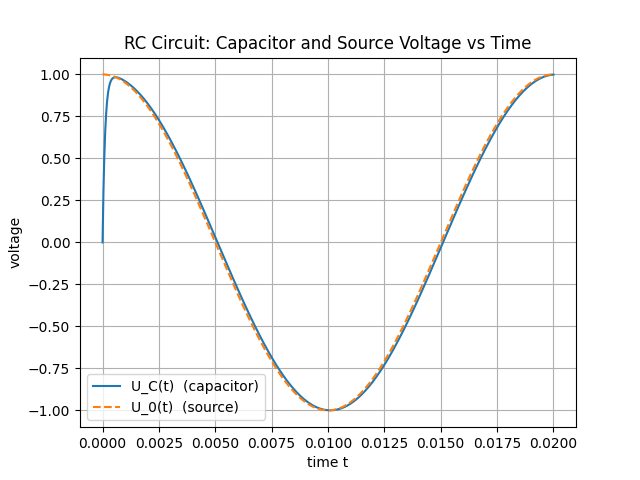
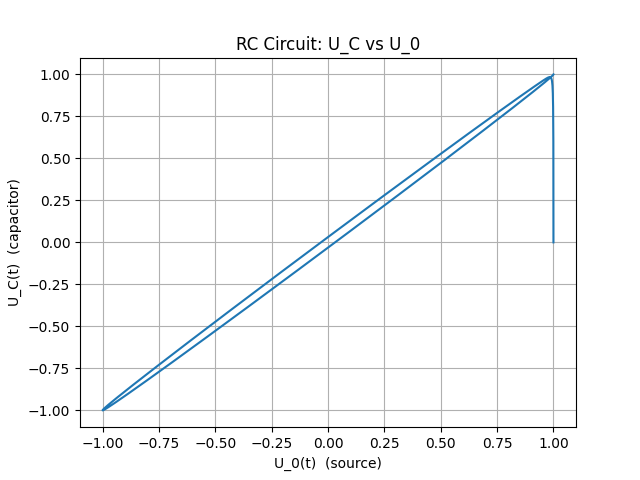

**Comment:** Capacitor voltage nearly matches the source signal. Requires very fine time resolution for accuracy.

---

## Improved Euler — 10 steps

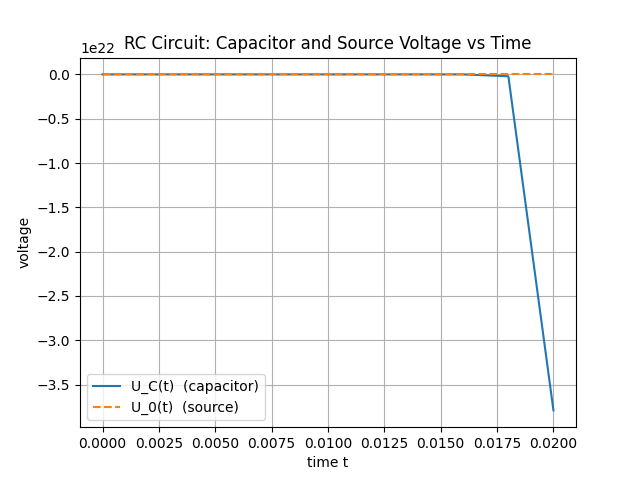  
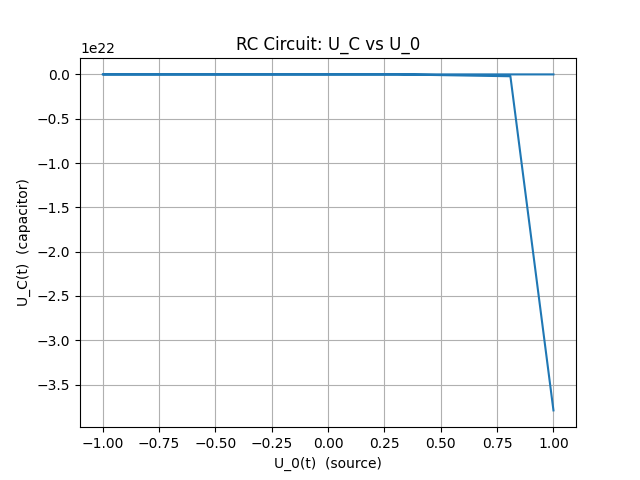

**Comment:** Much better than implicit Euler. Oscillations preserved, moderate phase error, stable.

---

## Improved Euler — 100 steps
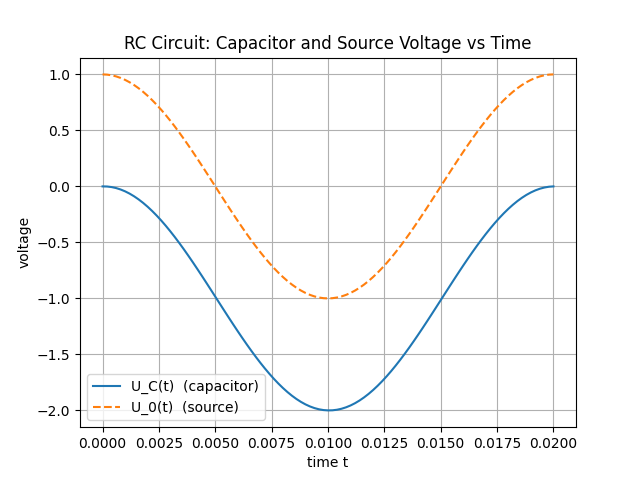
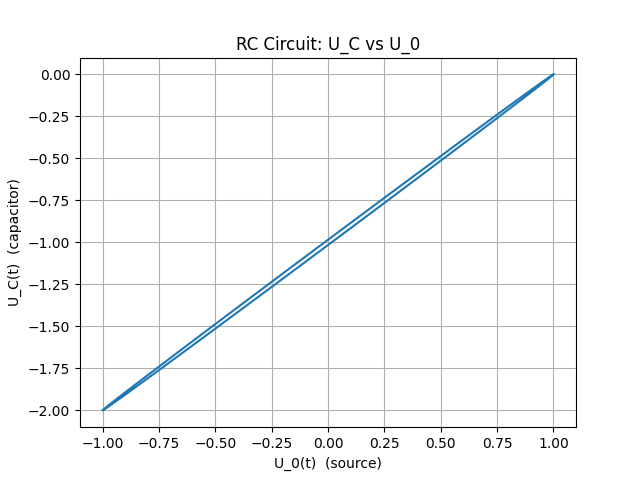  


**Comment:** Good compromise between cost and accuracy.

---

## Improved Euler — 1000 steps

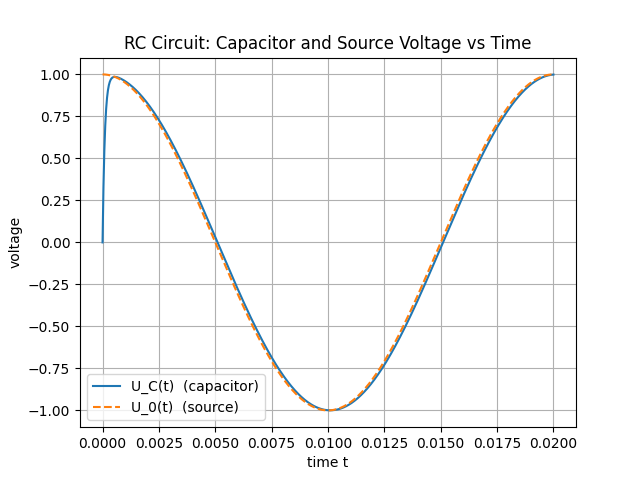  
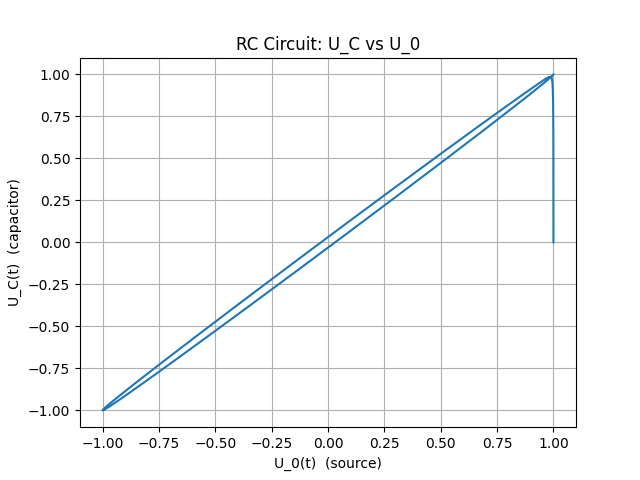

**Comment:** Very accurate solution. Only tiny differences to Crank–Nicolson remain.

---

## Crank–Nicolson — 10 steps

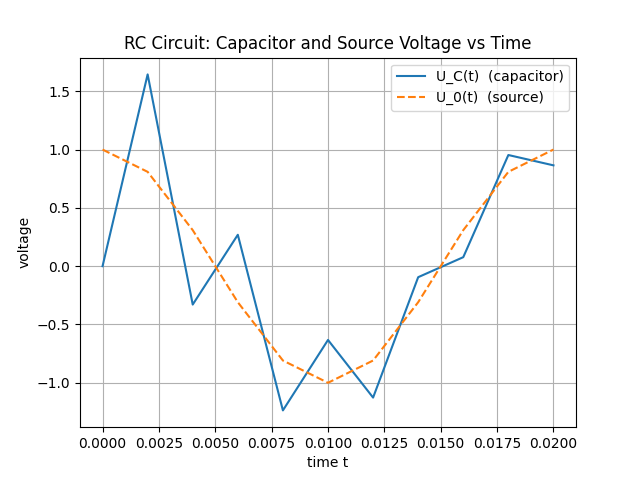
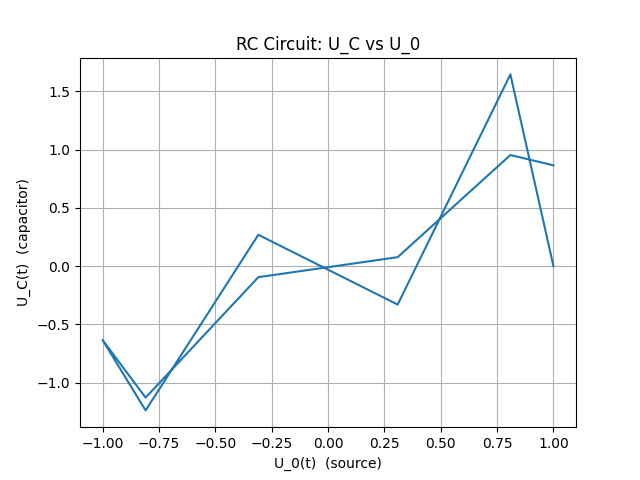


**Comment:**Oscillatory behavior preserved; low damping.

---

## Crank–Nicolson — 100 steps

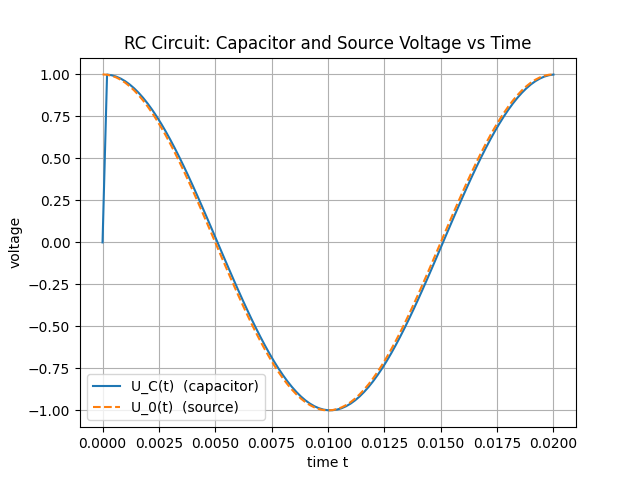
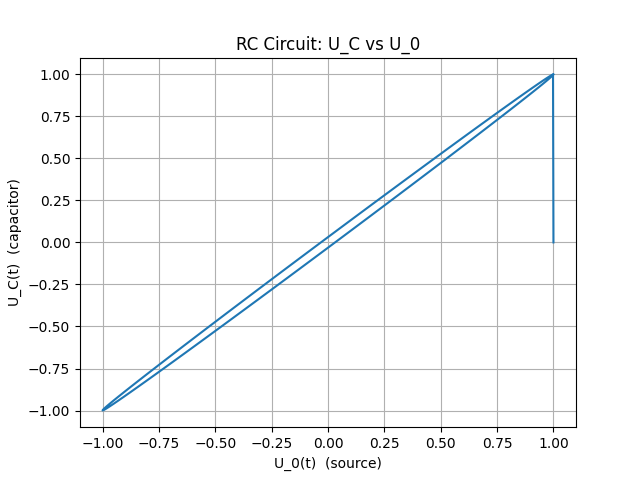

**Comment:** Accurate tracking of input voltage. Phase relation is good.

---

## Crank–Nicolson — 1000 steps

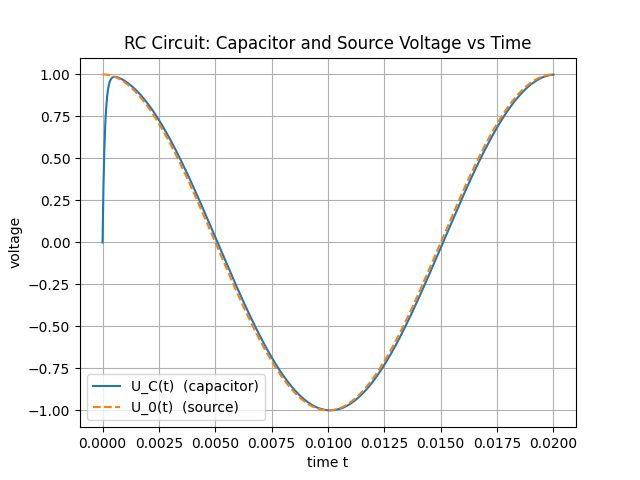
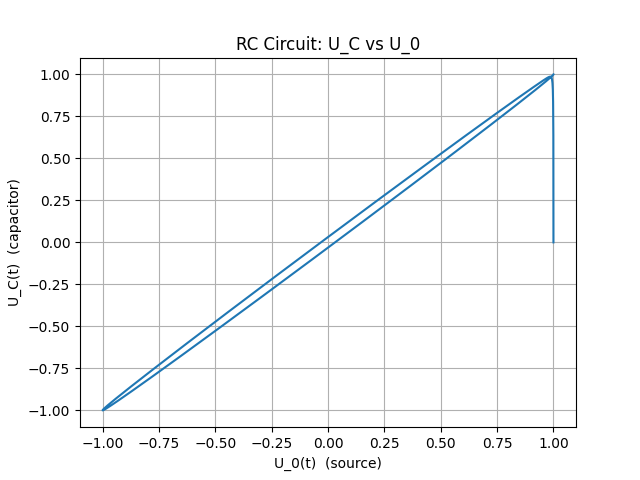 


**Comment:** No damping or distortion.

---

## Summary

- The system has a very small time constant $$(RC = 10^{-4})$$, so $$(U_C(t))$$ should follow $$(U_0(t))$$ closely.  
- Crank–Nicolson captures this accurately even for coarse steps.  
- Improved Euler is acceptable with medium step sizes.  
- Implicit Euler requires extremely fine steps to avoid excessive damping.


## RC Circuit Simulation (Crank–Nicolson, R = 1, C = 1, t_end = 0.02)

We consider the RC circuit governed by
$$
[
U_C'(t) = \frac{1}{RC}\left(U_0(t) - U_C(t)\right), \qquad U_0(t) = \cos(100\pi t),
]
with parameters
[
R = 1, \quad C = 1, \quad t_{\text{end}} = 0.02.
]
$$
The Crank–Nicolson method is applied with different numbers of time steps:
$$
[
N = 10,\; 100,\; 1000.
]
$$
For each case, we show a phase plot and a time plot and briefly comment on the behavior.

---

### Crank–Nicolson, N = 10 steps

**Phase plot**
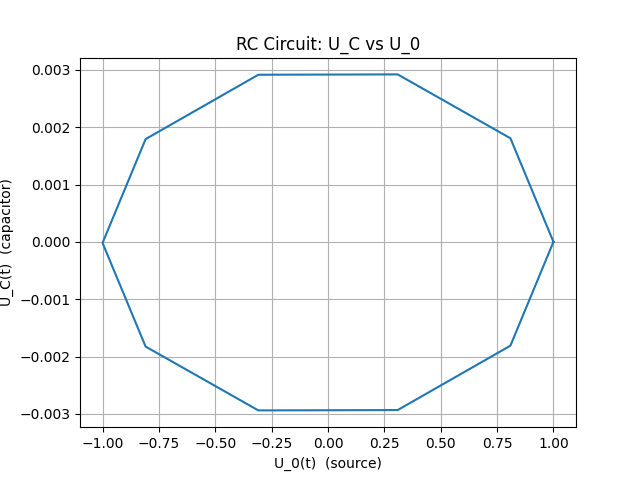


**Time plot**
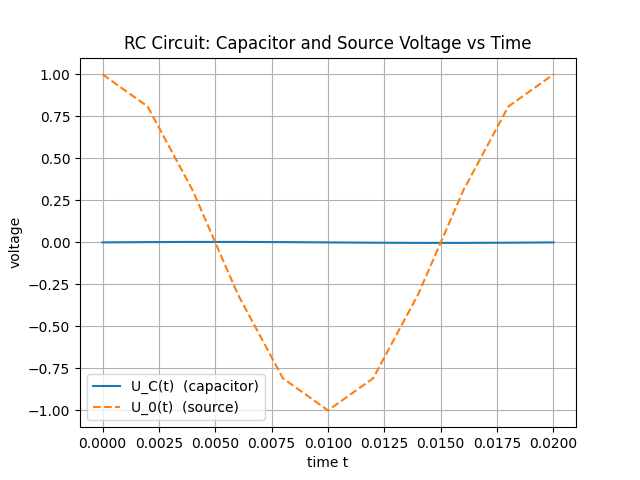


**Comment:**  
With only 10 steps over the interval \([0, 0.02]\), the time resolution is very coarse.  
The phase portrait appears polygonal rather than smooth, and the capacitor voltage \(U_C(t)\) does not accurately follow the sinusoidal input.  
Crank–Nicolson remains stable, but the large time step leads to noticeable phase and amplitude errors.

---

### Crank–Nicolson, N = 100 steps

**Phase plot**

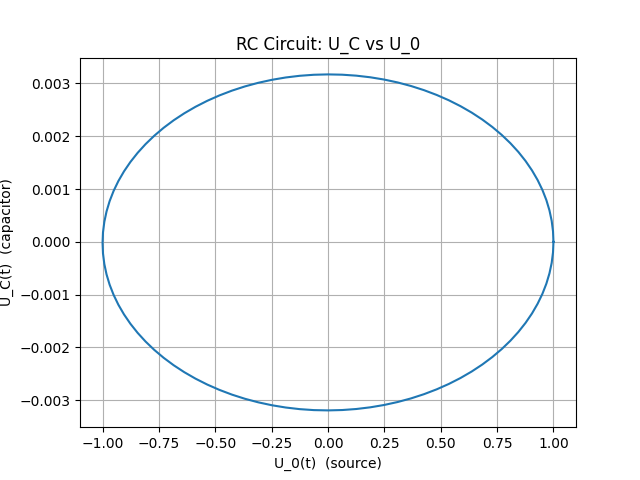

**Time plot**

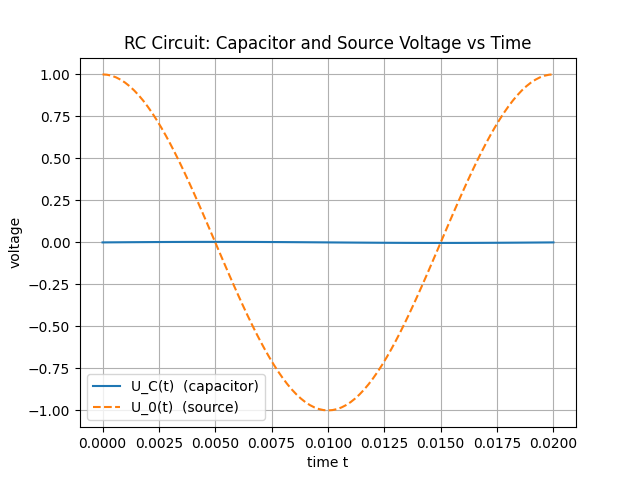

**Comment:**  
For \(N = 100\), the solution quality improves significantly.  
The phase plot becomes smoother and starts to resemble the expected elliptical trajectory.  
In the time plot, \(U_C(t)\) follows the source voltage more closely, with reduced phase lag and more accurate amplitude.

---

### Crank–Nicolson, N = 1000 steps

**Phase plot**
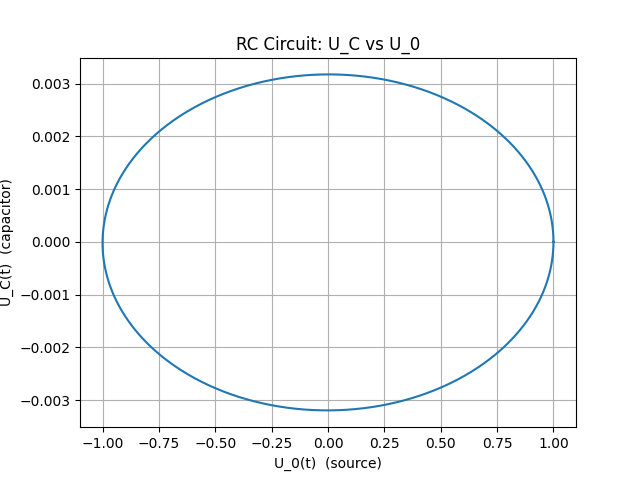


**Time plot**
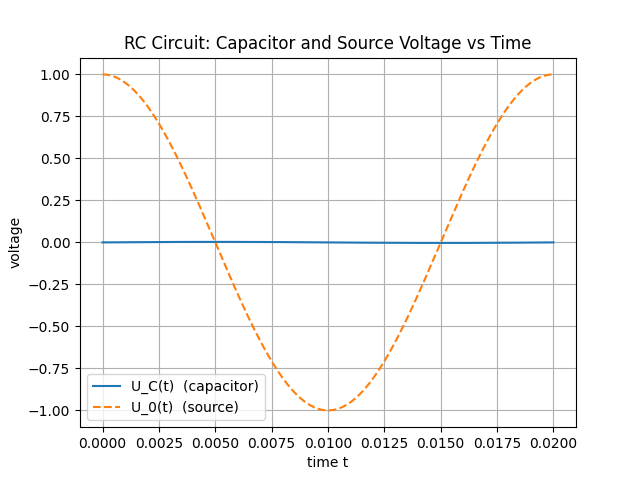


**Comment:**  
With \(N = 1000\), the Crank–Nicolson method yields a nearly perfect phase ellipse and a very accurate time evolution.  
The capacitor voltage tracks the sinusoidal input with very small errors in both amplitude and phase.  
At this resolution, the method effectively reaches its full second-order accuracy.

---

### Overall observation

- As the number of time steps increases from 10 to 1000, the Crank–Nicolson method transitions from a rough, low-resolution approximation to a very accurate representation of the RC circuit dynamics.  
- Even for coarse time steps, the method remains stable, but fine time steps are required to obtain quantitatively reliable results for this oscillatory problem.


## RC Circuit Simulation (Crank–Nicolson, R = 1, C = 1, t_end = 0.2)

We consider again the RC circuit governed by
$$
[
U_C'(t) = \frac{1}{RC}\left(U_0(t) - U_C(t)\right), \qquad U_0(t) = \cos(100\pi t),
]
with parameters
[
R = 1, \quad C = 1, \quad t_{\text{end}} = 0.2.
]
$$

The Crank–Nicolson method is applied with different numbers of time steps:
$$
[
N = 10,\; 100,\; 1000.
]
$$

On this longer time interval, the source completes many oscillations, while the RC time constant \(RC = 1\) is still much larger than \(t_{\text{end}}\).  
Therefore the capacitor voltage changes only slowly compared to the fast input.

For each case, we show a phase plot and a time plot and briefly comment on the behavior.

---

### Crank–Nicolson, N = 10 steps

**Phase plot**
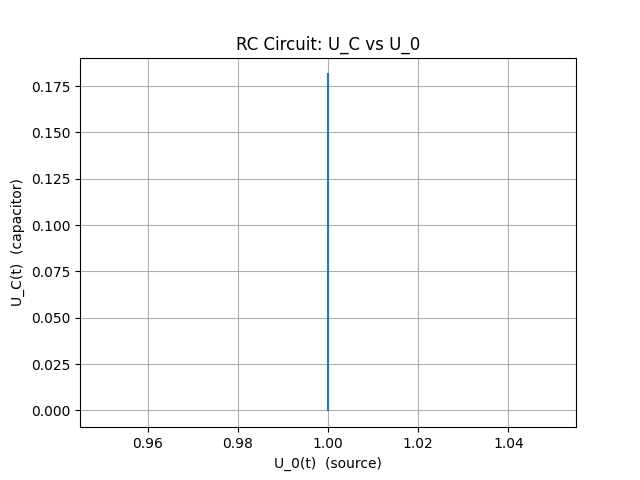


**Time plot**
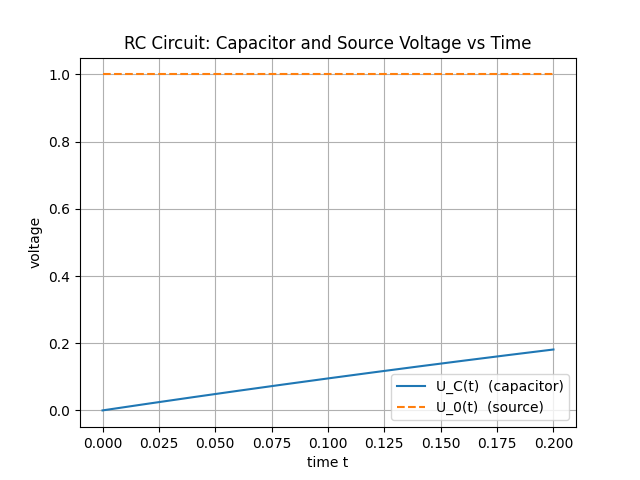


**Comment:**  
With only 10 steps over \(t \in [0, 0.2]\), the resolution is very coarse.  
The phase portrait consists of a few large segments and does not yet form a smooth curve.  
In the time plot, the capacitor voltage \(U_C(t)\) remains very small and changes only slowly, which is physically consistent with \(RC = 1\), but the coarse discretization limits the accuracy of the shape.

---

### Crank–Nicolson, N = 100 steps

**Phase plot**
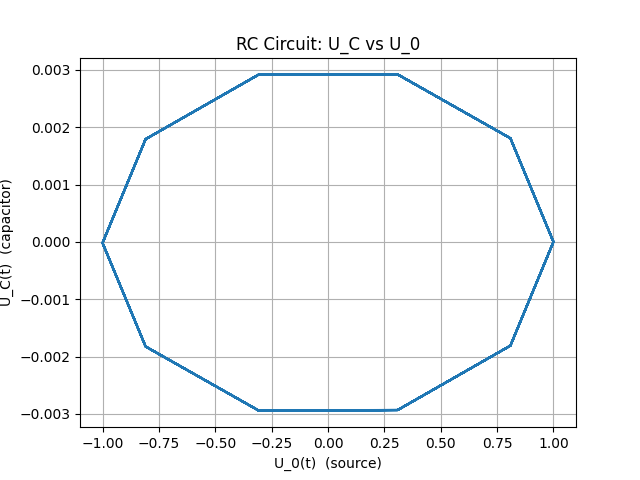


**Time plot**
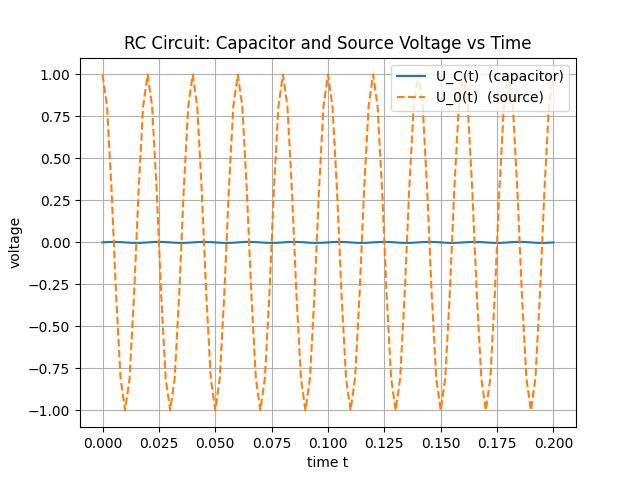


**Comment:**  
For \(N = 100\) the phase plot becomes smoother and begins to trace out a clearer curve.  
The time evolution of \(U_C(t)\) shows a slow charging behavior superimposed with a very small ripple due to the fast forcing.  
Crank–Nicolson remains stable and captures the slow dynamics more reliably than in the \(N = 10\) case.

---

### Crank–Nicolson, N = 1000 steps

**Phase plot**
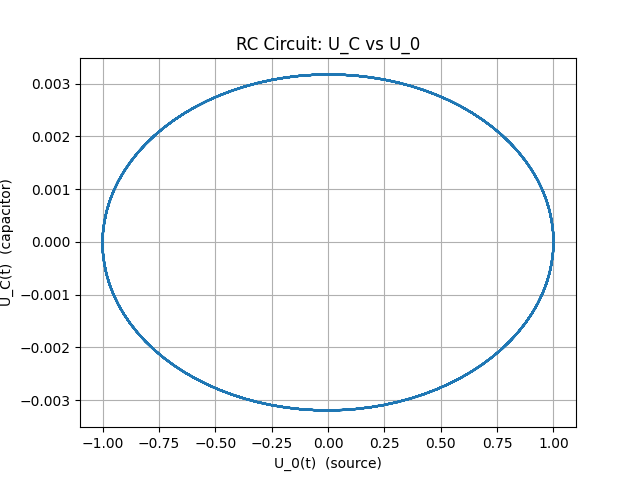


**Time plot**
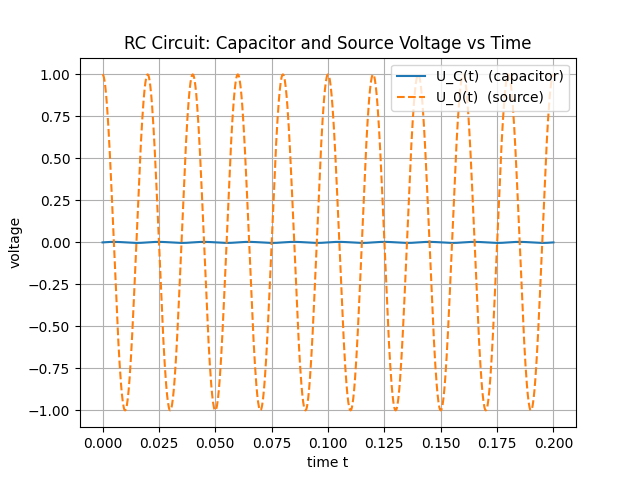


**Comment:**  
With \(N = 1000\), the numerical solution is very smooth.  
The phase plot forms a well-resolved curve, and the time plot clearly shows the slow increase of $(U_C(t))$ over many fast oscillations of the input.  
The capacitor voltage remains small compared to $$(U_0(t))$$, which is correct for a large time constant $(RC = 1)$ over the relatively short interval $(t_{text{end}} = 0.2)$.  
Crank–Nicolson accurately captures this slow transient behavior without instability.

---

### Overall observation for t_end = 0.2

- The RC time constant $$(RC = 1)$$ is still much larger than the simulated time interval, so $$(U_C(t))$$ changes only slowly.  
- Crank–Nicolson is unconditionally stable for all tested step sizes.  
- Increasing the number of time steps from 10 to 1000 mainly improves the **smoothness** and **resolution** of the slow capacitor response, while preserving the correct behavior.


## RC Circuit Simulation (Implicit Euler, R = 1, C = 1, t_end = 0.02)


The **Implicit Euler** method is applied with different numbers of time steps
$$
[
N = 10,\; 100,\; 1000.
]
$$


For each \(N\) we show a phase plot and a time plot and comment on the behavior.

---

## Implicit Euler, N = 10 steps

### Phase plot  
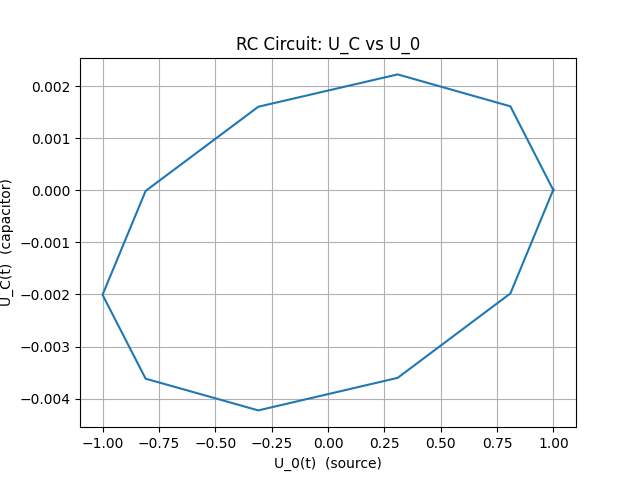

### Time plot  
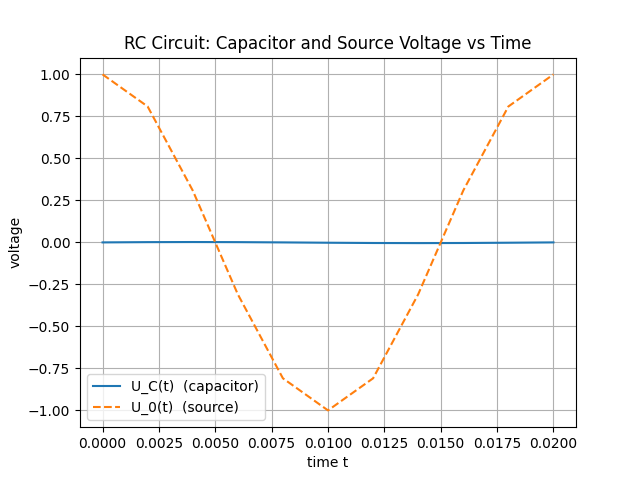

### Comment

- With only \(N = 10\) steps on \([0,0.02]\), the step size is very large relative to the period.
- The phase portrait collapses close to the origin: the rapid oscillations of the input are almost completely damped out by the implicit Euler method.
- In the time plot, the capacitor voltage \(U_C(t)\) stays essentially near zero while the source voltage oscillates rapidly.  
  This illustrates the strong numerical damping of implicit Euler for coarse time steps.

---

## Implicit Euler, N = 100 steps

### Phase plot  
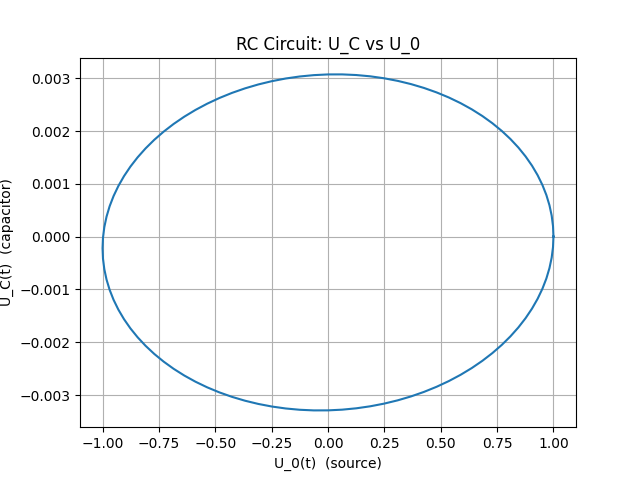

### Time plot  
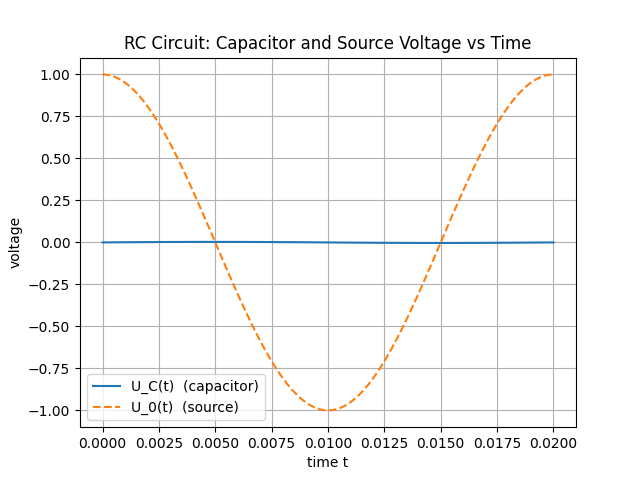

### Comment

- With \(N = 100\), the step size is smaller and the phase plot becomes smoother, forming a small, more regular loop near the origin.
- The time evolution still shows a very small capacitor voltage compared to the source, but a tiny oscillatory response of \(U_C(t)\) is now visible.
- The method remains very stable; high-frequency components of the forcing are still heavily damped, which is characteristic of implicit Euler.

---

## Implicit Euler, N = 1000 steps

### Phase plot  
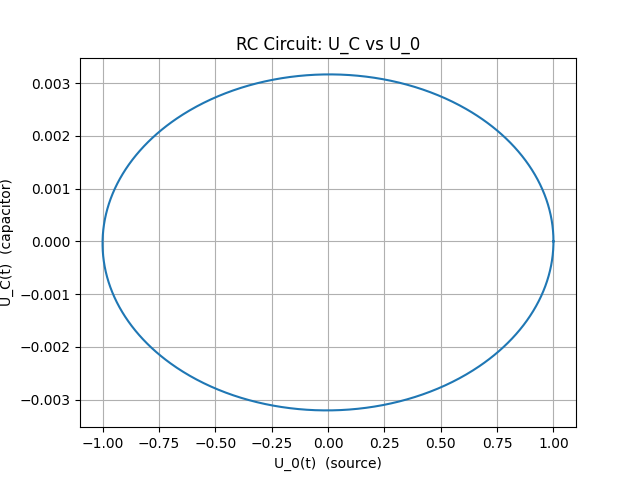

### Time plot  
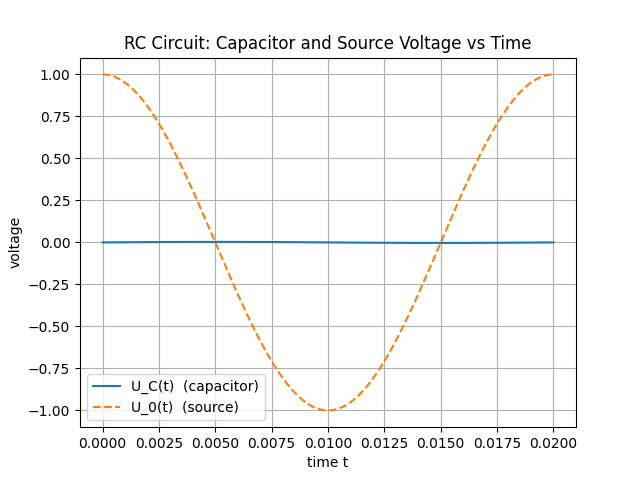

### Comment

- For \(N = 1000\), the discrete trajectory in phase space forms a smooth, narrow curve.
- In the time plot, the capacitor voltage slowly starts to follow the rapid oscillations of the input, but with very small amplitude, which is physically correct because \(RC = 1\) and the interval is short.
- Implicit Euler accurately captures the slow part of the dynamics while strongly damping the high-frequency oscillations. The solution is smooth and completely stable.

---

## Overall conclusions for Implicit Euler, t_end = 0.02

- The physical time constant \(RC = 1\) is much larger than the simulation window, so the true capacitor voltage remains small; this is reflected in all simulations.
- Implicit Euler is **unconditionally stable** and **strongly damping**:
  for coarse step sizes it almost completely suppresses the high-frequency oscillations.
- Refining the time step from \(N = 10\) to \(N = 1000\) reduces numerical damping and
  yields smoother, more accurate phase and time plots, while the qualitative behavior
  (small \(U_C(t)\), no instability) remains the same.


## RC Circuit Simulation (Implicit Euler, R = 1, C = 1, t_end = 0.2)


\]

The **implicit Euler method** is applied with different numbers of time steps
\[
N = 10,\; 100,\; 1000.
\]

Since the RC time constant is \(RC = 1\), which is much larger than the simulated time interval, the capacitor voltage reacts very slowly compared to the fast oscillations of the source. Implicit Euler is strongly damping and unconditionally stable, so we expect strong numerical dissipation, especially for coarse time steps.

For each case we show a phase plot and a time plot and briefly comment on the behavior.

---

### Implicit Euler, N = 10 steps

**Phase plot**
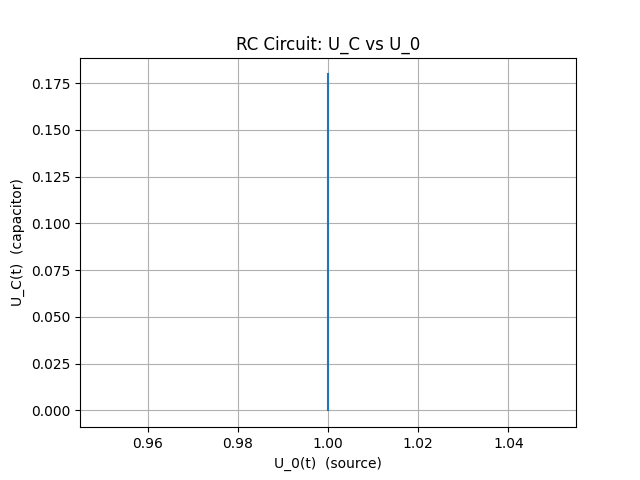


**Time plot**
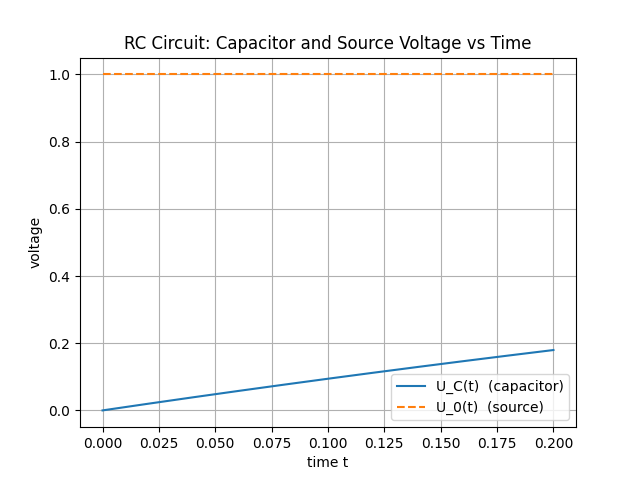


**Comment:**  
With only \(N = 10\) steps, the phase portrait degenerates into a nearly vertical line near \(U_0 \approx 1\).  
The time plot shows that the capacitor voltage \(U_C(t)\) hardly follows the fast oscillations of the source at all; it is strongly damped and grows only very slowly.  
This is a consequence of both the large time constant \(RC = 1\) and the strong numerical damping of implicit Euler for such a coarse time step.

---

### Implicit Euler, N = 100 steps

**Phase plot**
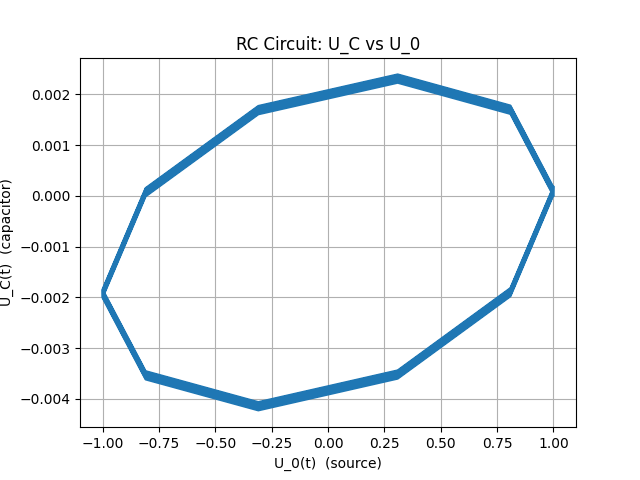


**Time plot**
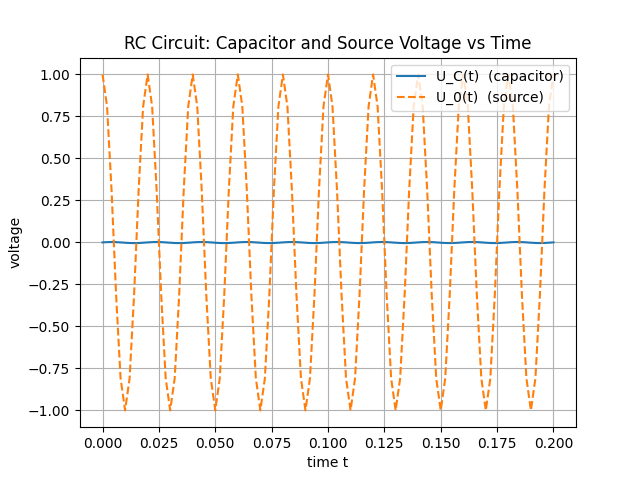


**Comment:**  
For \(N = 100\) the phase plot becomes an oblique, slightly “tilted” loop, but still much smaller than the true ellipse of the continuous system.  
In the time plot, \(U_C(t)\) remains close to zero and shows only a very small oscillation around zero, while \(U_0(t)\) continues its full-amplitude cosine motion.  
The method is stable, but the numerical dissipation is still strong, so the high-frequency content of the forcing is essentially filtered out.

---

### Implicit Euler, N = 1000 steps

**Phase plot**
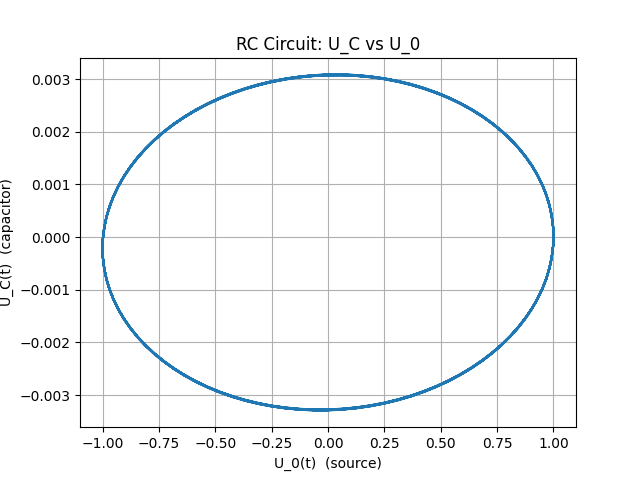


**Time plot**
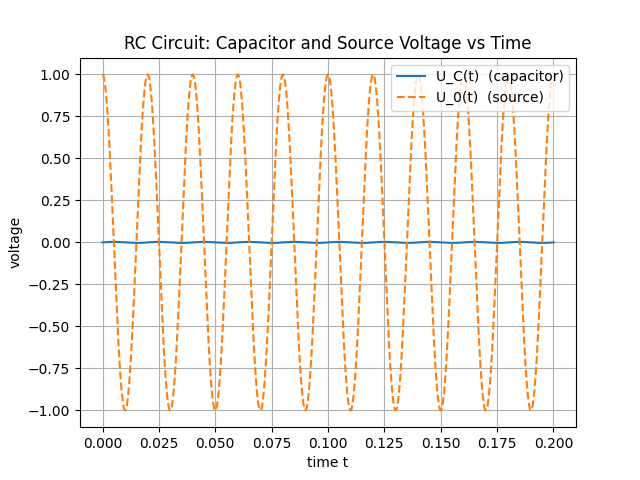


**Comment:**  
With \(N = 1000\), the phase portrait approaches a small ellipse centered near the origin, but its radius is still much smaller than for energy-conserving schemes (like Crank–Nicolson).  
The time plot shows a slowly increasing \(U_C(t)\) with a small ripple; the source \(U_0(t)\) still oscillates with amplitude 1.  
Implicit Euler captures the correct qualitative trend (slow charging of the capacitor) but significantly underestimates the amplitude of the oscillatory response due to its strong damping of high frequencies.

---

### Overall observations for t_end = 0.2 (Implicit Euler)

- The physical time constant \(RC = 1\) is much larger than \(t_{\text{end}} = 0.2\), so the capacitor voltage should change slowly and stay relatively small.  
- Implicit Euler is **unconditionally stable**, but introduces strong numerical dissipation.  
- For coarse step sizes (e.g., \(N = 10\)) the oscillations in \(U_C(t)\) are almost completely suppressed.  
- Increasing the number of steps from 10 to 1000 improves the resolution and makes the phase portraits and time plots smoother, but the method still damps the oscillatory response more than energy-conserving schemes such as Crank–Nicolson.


## RC Circuit Simulation (Improved Euler, R = 1, C = 1, t_end = 0.02)


The **Improved Euler method**  is applied with different numbers of time steps
\[
N = 10,\; 100,\; 1000.
\]

Because the time constant \(RC = 1\) is much larger than $$(t_{\text{end}})$$, the capacitor voltage $$(U_C(t))$$ changes only slowly, while the source voltage $$(U_0(t))$$ oscillates rapidly.  
For each step size we show a phase plot $$(U_C)$$ vs. $$(U_0)$$ and a time plot, and briefly discuss the behavior.

---

### Improved Euler, N = 10 steps

**Phase plot**
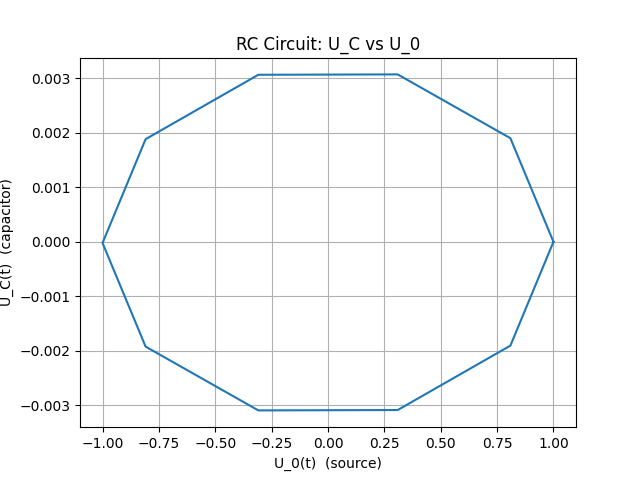


**Time plot**
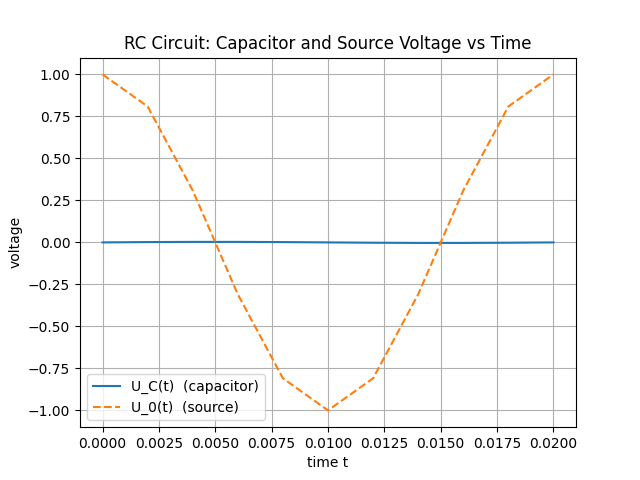

**Comment:**  
With only \(N = 10\) steps, the phase trajectory is a coarse polygon with clearly visible corners instead of a smooth curve.  
In the time plot, the capacitor voltage remains very small and almost flat around zero, while $$(U_0(t))$$ completes one fast cosine oscillation.  
The qualitative behavior (slow capacitor response vs. fast input) is captured, but the resolution is poor and small details of the transient are not reliable.

---

### Improved Euler, N = 100 steps

**Phase plot**
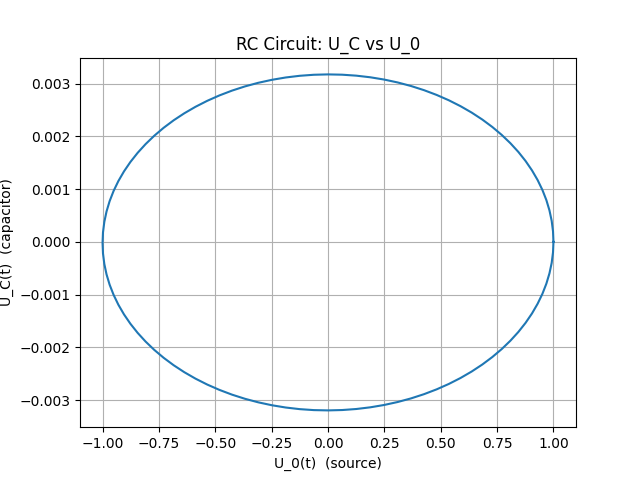


**Time plot**
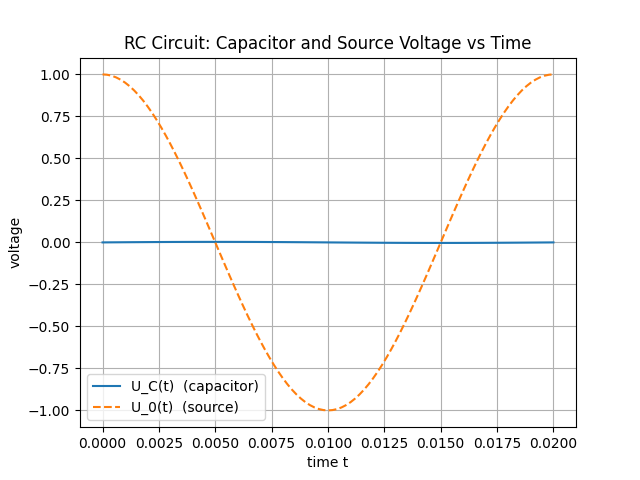


**Comment:**  
For \(N = 100\), the phase portrait already looks much smoother and starts to resemble an ellipse.  
The time evolution shows a tiny but now better resolved response of \(U_C(t)\) to the oscillating input.  
The method is stable and second-order accurate; with this step size it gives a reasonable approximation of the slow capacitor dynamics on the short interval \([0, 0.02]\).

---

### Improved Euler, N = 1000 steps

**Phase plot**
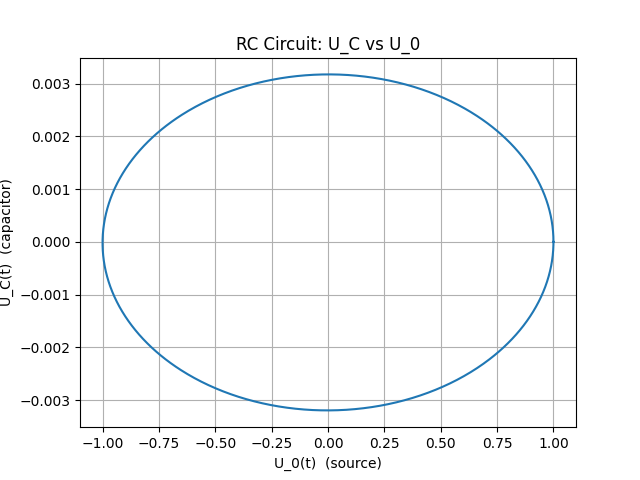


**Time plot**
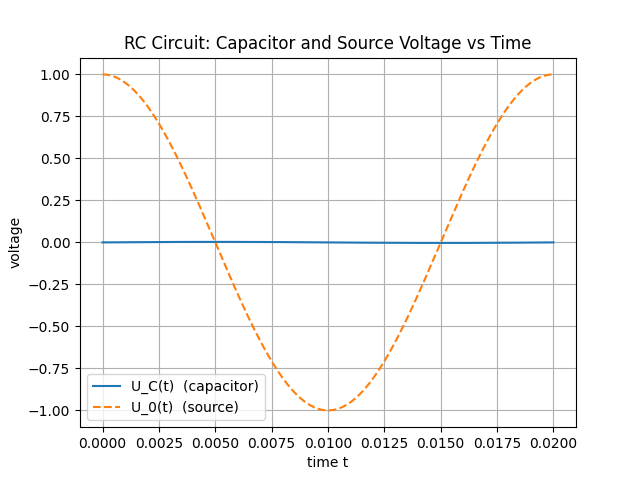


**Comment:**  
With \(N = 1000\) steps, the phase plot becomes a very smooth closed curve, essentially matching the expected continuous trajectory.  
The time plot clearly shows a very small, smooth variation of $$(U_C(t))$$ while the source $$(U_0(t))$$ performs a full cosine period.  
At this resolution, the Improved Euler method accurately resolves both the fast forcing and the tiny capacitor response 

---

### Overall observation for t_end = 0.02 (Improved Euler)

- Since $$(RC = 1 \gg t_{\text{end}})$$, the capacitor behaves almost like an open circuit on this short time scale: $$(U_C(t))$$ changes only slightly.  
- The Improved Euler method remains stable for all tested step sizes.  
- Increasing \(N\) mainly improves **smoothness** and **accuracy** of the phase trajectory and time series; the qualitative picture (slow, small-amplitude response of $$(U_C))$$ is already visible even for coarse steps.


## RC Circuit Simulation (Improved Euler, R = 1, C = 1, t_end = 0.2)


We apply the **Improved Euler  method** with  
$$
[
N = 10,\; 100,\; 1000.
]
$$
For each case, phase plots and time plots are shown, followed by short comments.

---

### Improved Euler — N = 10 steps

**Phase plot**
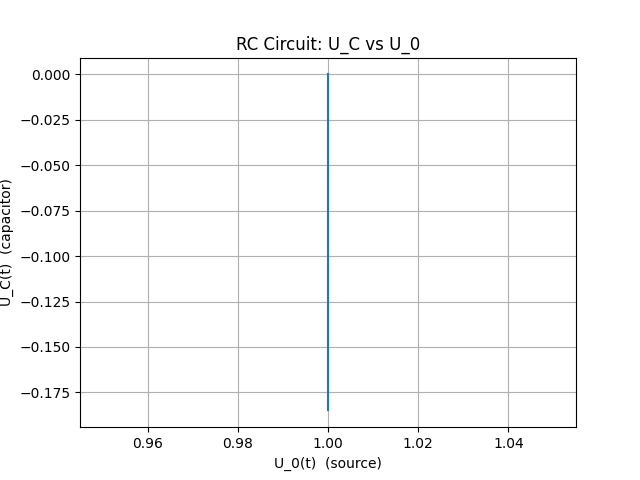


**Time plot**
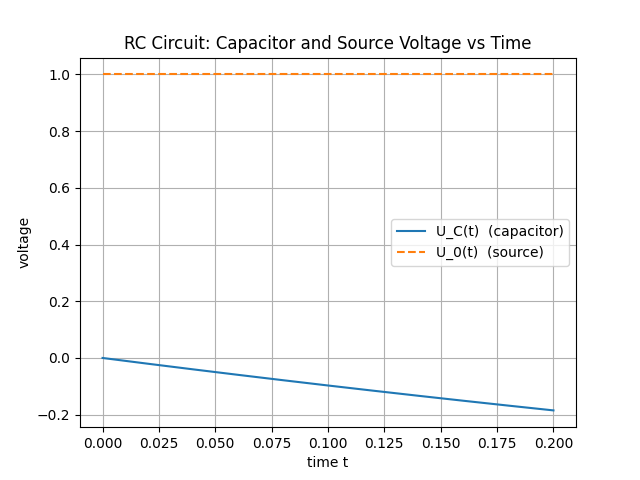


**Comment:**  
- Δt = 0.02 equals one full period of the forcing.  
- The solver samples the cosine always at the same phase → **forcing looks constant**.  
- Oscillations disappear   
- The method fails completely at this coarse resolution.

---

### Improved Euler — N = 100 steps

**Phase plot**
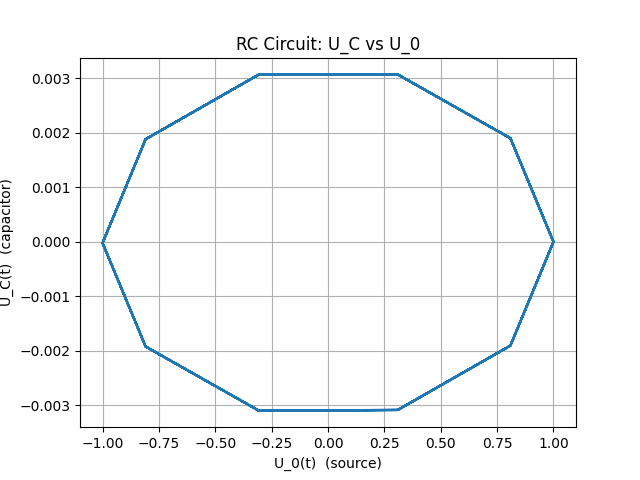

**Time plot**
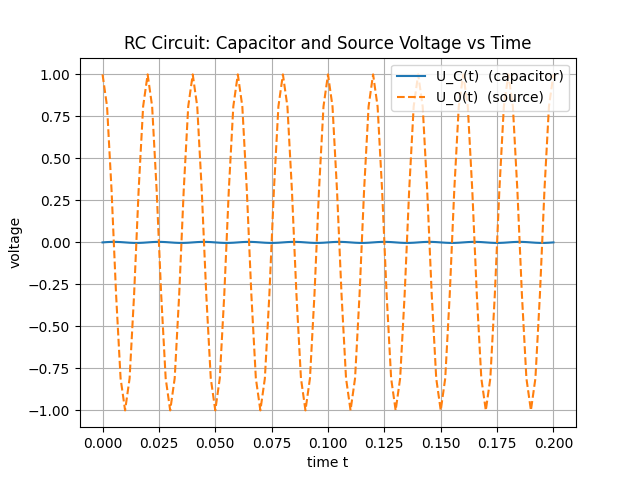


**Comment:**    
- The capacitor voltage remains small, with a weak oscillatory ripple.  
- Behavior is correct but still not smooth.

---

### Improved Euler — N = 1000 steps

**Phase plot**
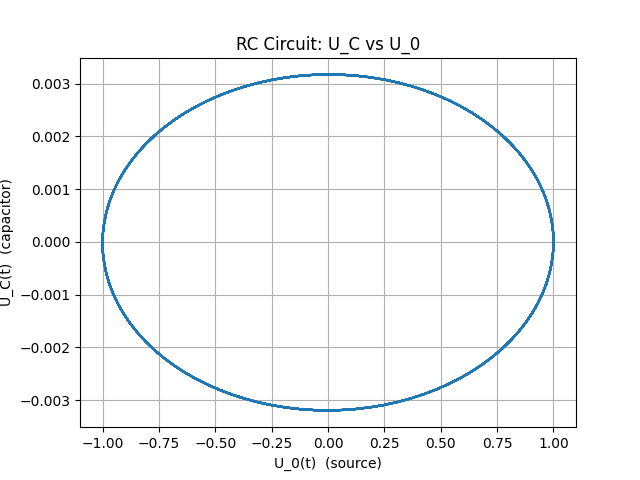


**Time plot**
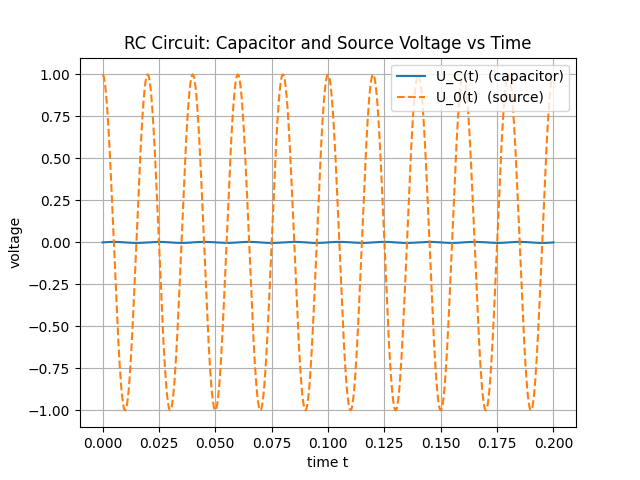


**Comment:**  
- Δt = 0.0002 → fine resolution (100 samples per forcing period).  
- Phase portrait is smooth and elliptical.  
- Time evolution shows a small, accurate oscillatory response.  
- Numerical behavior is stable, and solution quality is high.

---

### Overall Observations for Improved Euler at t_end = 0.2

- Since $$(RC = 1 \gg T = 0.02)$$, the capacitor responds **very slowly**;  
  $$(U_C(t))$$ remains small for all tested step sizes.  
- The method only produces correct results when **Δt is small enough to resolve the forcing**.  
- Poor resolution (N=10) yields incorrect, nonphysical solutions.  
- Increasing N → smoother phase plots + accurate transient behavior.  


##Exrercise 19.4

This exercise investigates several Runge–Kutta (RK) time-integration schemes for solving
ordinary differential equations (ODEs) of the form

\[
\dot{y}(t) = f(t, y(t)),
\qquad y(0) = y_0.
\]

The goal of this exercise is threefold:

1. To review explicit Runge–Kutta methods of different orders.
2. To implement a general-purpose `ExplicitRungeKutta` class using Butcher tableaux.
3. To compare accuracy and numerical stability across several RK schemes.

We apply the methods on test ODEs where the analytical solution is known, allowing quantitative error studies.


